In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# PhD course
## Volumetric Modelling


Digital Building Technologies DBT<br>
[dbt.arch.ethz.ch](http://dbt.arch.ethz.ch)

Mathias Bernhard<br>
[bernhard@arch.ethz.ch](mailto:bernhard@arch.ethz.ch)

# Boundary Representation

list of vertices for a rectangle with sides `a` and `b`
<pre>
v -a/2 -b/2 
v  a/2 -b/2
v  a/2  b/2
v -a/2  b/2
</pre>

list of lines / edges connecting the vertices
<pre>
l 0 l
l 1 2
l 2 3
l 3 0
</pre>

rectangular face created from the 4 points
<pre>f 0 1 2 3</pre>

(-4.0, 4.0, -4.0, 4.0)

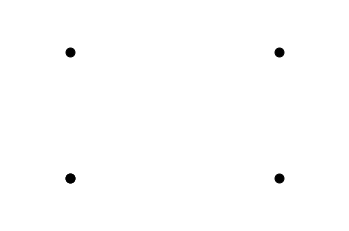

In [4]:
a, b = 5., 3.
v = [[-a/2,-b/2], [a/2,-b/2], [a/2,b/2], [-a/2,b/2], [-a/2,-b/2]]
vx = [c[0] for c in v]
vy = [c[1] for c in v]
plt.scatter(vx,vy, s=80, c='k')
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

(-4.0, 4.0, -4.0, 4.0)

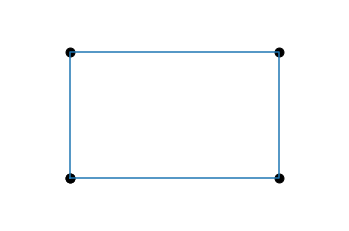

In [5]:
plt.scatter(vx,vy, s=80, c='k')
plt.plot(vx,vy)
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

# Function Representation

<pre>f(x,y) = max(abs(x) - a/2, abs(y) - b/2)</pre>

## sample space at discrete intervals

In [6]:
mr = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = max(abs(cx) - a/2, abs(cy) - b/2)
        mr[y,x] = d

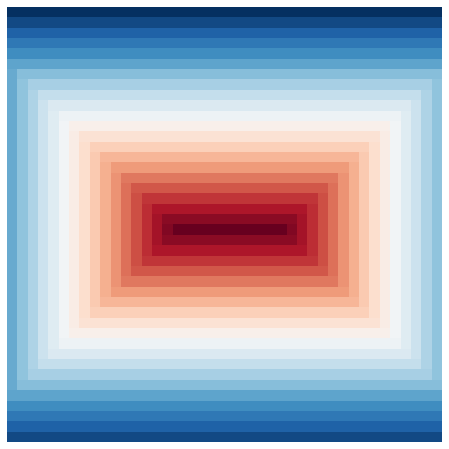

In [8]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mr, cmap='RdBu')

## boundary is where f(x,y)=0

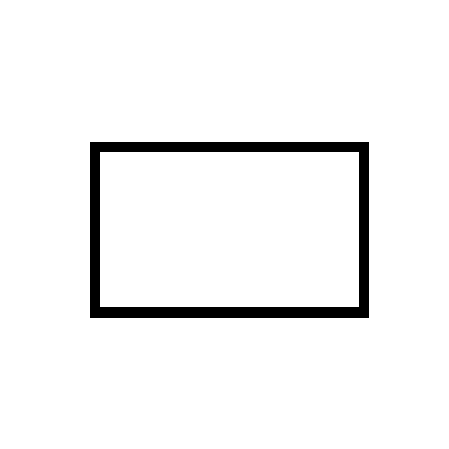

In [9]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mr)<0.1,cmap='Greys')

## More Primitives: box, sphere, torus, cylinder, cone, ...
### Circle:
<pre>f(x,y) = sqrt(x**2 + y**2) - r</pre>

In [10]:
mc = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = math.sqrt(cx**2 + cy**2) - 2.2
        mc[y,x] = d

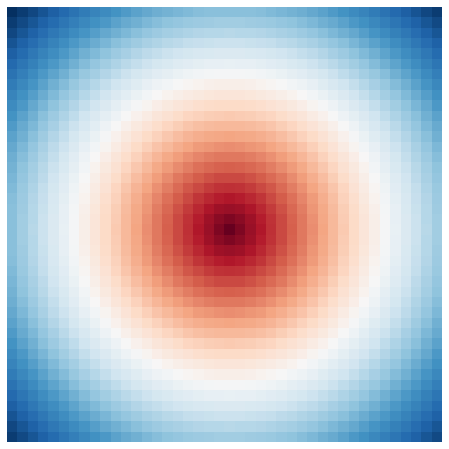

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mc, cmap='RdBu')

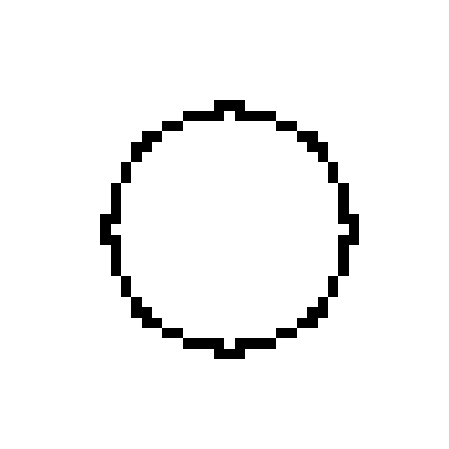

In [10]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mc)<0.1,cmap='Greys')

## OOP: Primitive Classes

In [25]:
class Rectangle(object):
    def __init__(self, px, py, w, h):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
    
    def get_distance(self, x, y):
        max(abs(x-self.px) - self.w/2, abs(y-self.py) - self.h/2)

In [24]:
class Circle(object):
    def __init__(self, px, py, r):
        self.px = px
        self.py = py
        self.r  = r
    
    def get_distance(self, x, y):
        return math.sqrt((self.px-x)**2 + (self.py-y)**2) - self.r

## Boolean operations

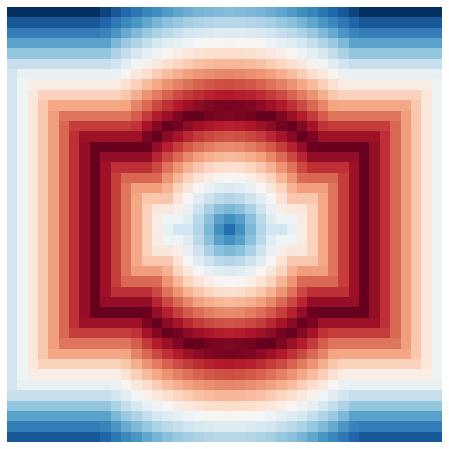

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc)),cmap='RdBu')

### Union
min(A, B)

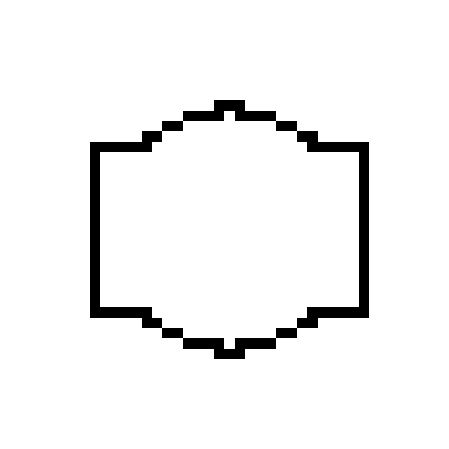

In [17]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc))<0.1,cmap='Greys')

### Intersection
max(A, B)

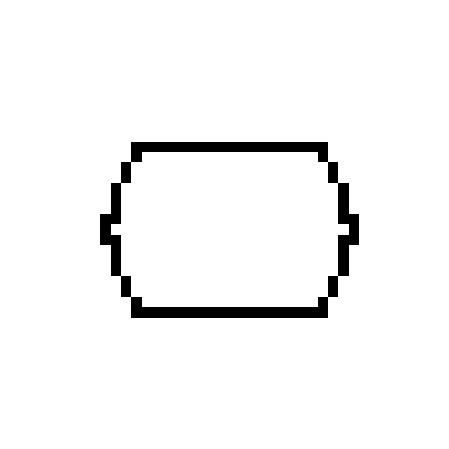

In [13]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,mc))<0.1,cmap='Greys')

### Subtraction
max(A, -B)

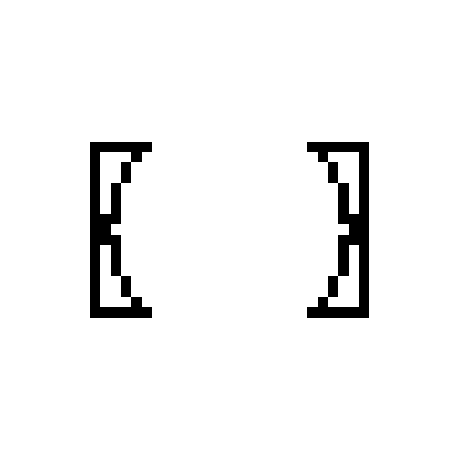

In [14]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,-mc))<0.1,cmap='Greys')

### Subtraction
max(-A, B)

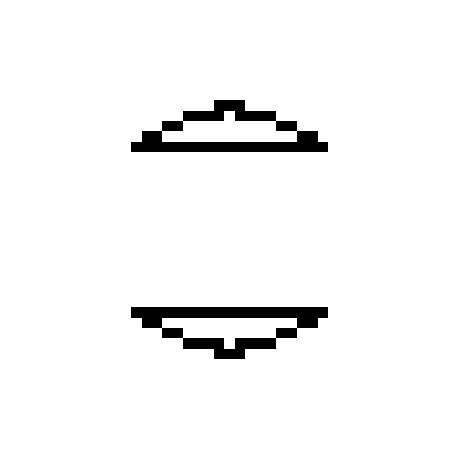

In [15]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(-mr,mc))<0.1,cmap='Greys')

### Iso-Contour

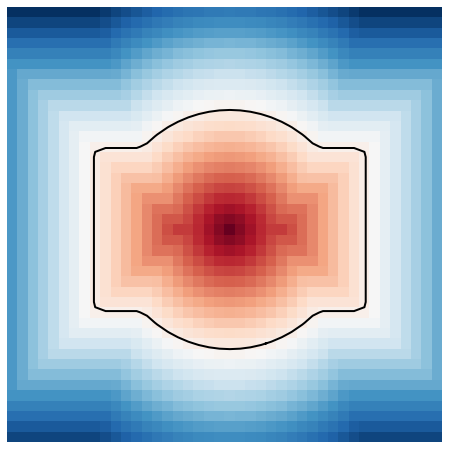

In [12]:
from skimage import measure
contours = measure.find_contours(np.minimum(mr,mc), 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(np.minimum(mr,mc),cmap='RdBu')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

### Offset and Shell

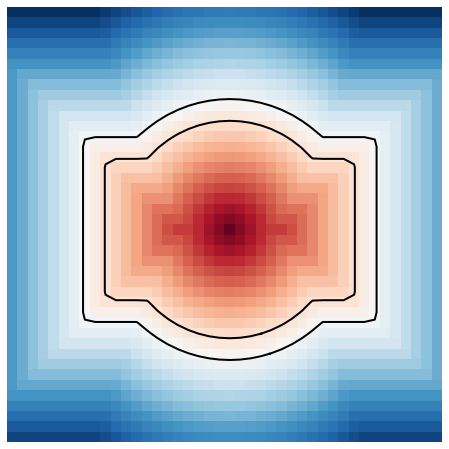

In [16]:
contours = measure.find_contours(abs(np.minimum(mr,mc))-0.2, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(np.minimum(mr,mc),cmap='RdBu')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

In [17]:
class Union(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return min(d)

In [32]:
import random
cs = []
for i in range(10):
    c = Circle(random.random()*10,random.random()*10,1+random.random()*1.5)
    cs.append(c)
u = Union(cs)

In [60]:
n = 64
mcs = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = u.get_distance(cx,cy)
        mcs[y,x] = d

### Bubbles

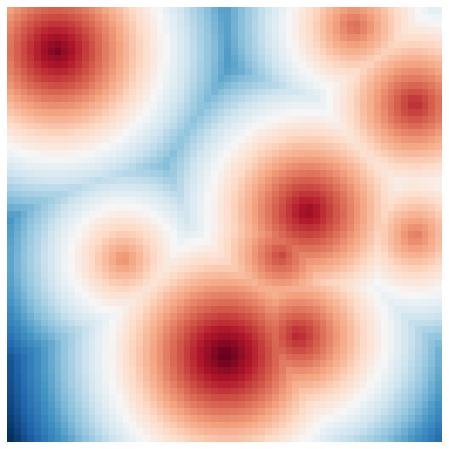

In [61]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mcs, cmap='RdBu')

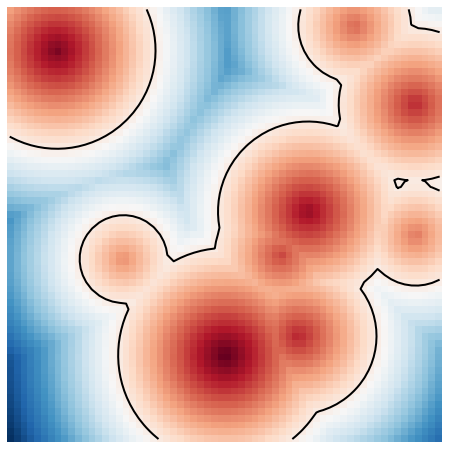

In [62]:
contours = measure.find_contours(mcs, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mcs,cmap='RdBu')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

In [75]:
class Lattice(object):
    def __init__(self, wl=1.):
        self.wl = wl
    
    def get_distance(self, x, y):
        d = math.sin(x*math.pi/self.wl)+math.sin(y*math.pi/self.wl)
        return abs(d)-0.4

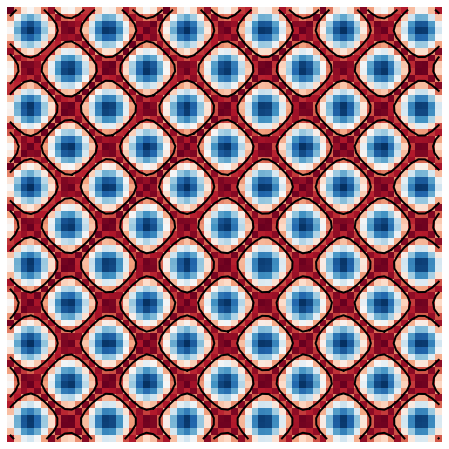

In [76]:
l = Lattice(0.9)
n = 64
ml = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = l.get_distance(cx,cy)
        ml[y,x] = d
        
contours = measure.find_contours(ml, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(ml, cmap='RdBu')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

In [68]:
class Intersection(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return max(d)

In [69]:
class Shell(object):
    def __init__(self, obj=None, d=1.):
        self.obj = obj
        self.d = d
    
    def get_distance(self, x, y):
        return abs(self.obj.get_distance(x,y))-self.d

In [77]:
i = Intersection([l,u])
csh = Shell(u,0.3)
u2 = Union([i,csh])

compl = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = (x/float(n))*10
        cy = (y/float(n))*10
        d = u2.get_distance(cx,cy)
        compl[y,x] = d

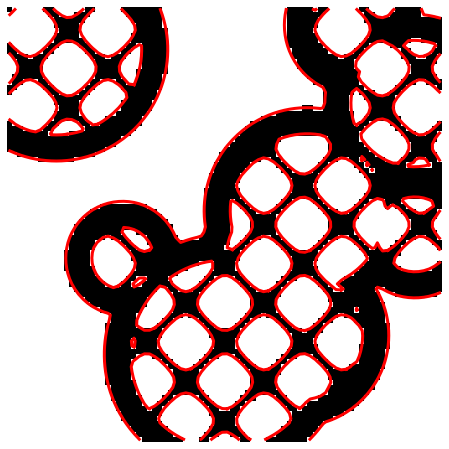

In [81]:
contours = measure.find_contours(compl, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(compl<0, cmap='Greys')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=3, c='r')